# Description: this program uses an artificial recurrent neural netwrok called Long Short Term Memory (LSTM) to predict the closing price of an Index (S&P 500) using the past 60 day Index price.

In [1]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('fivethirtyeight')

In [2]:
# Get the stock quote
df = web.DataReader('^GSPC', data_source='yahoo', start='2012-01-01', end='2020-12-17')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1284.619995,1258.859985,1258.859985,1277.060059,3943710000,1277.060059
2012-01-04,1278.729980,1268.099976,1277.030029,1277.300049,3592580000,1277.300049
2012-01-05,1283.050049,1265.260010,1277.300049,1281.060059,4315950000,1281.060059
2012-01-06,1281.839966,1273.339966,1280.930054,1277.810059,3656830000,1277.810059
2012-01-09,1281.989990,1274.550049,1277.829956,1280.699951,3371600000,1280.699951
...,...,...,...,...,...,...
2020-12-11,3665.909912,3633.399902,3656.080078,3663.459961,4367150000,3663.459961
2020-12-14,3697.610107,3645.840088,3675.270020,3647.489990,4594920000,3647.489990
2020-12-15,3695.290039,3659.620117,3666.409912,3694.620117,4360280000,3694.620117


In [3]:
# Get the number of rows and columns in the data set
df.shape

(2256, 6)

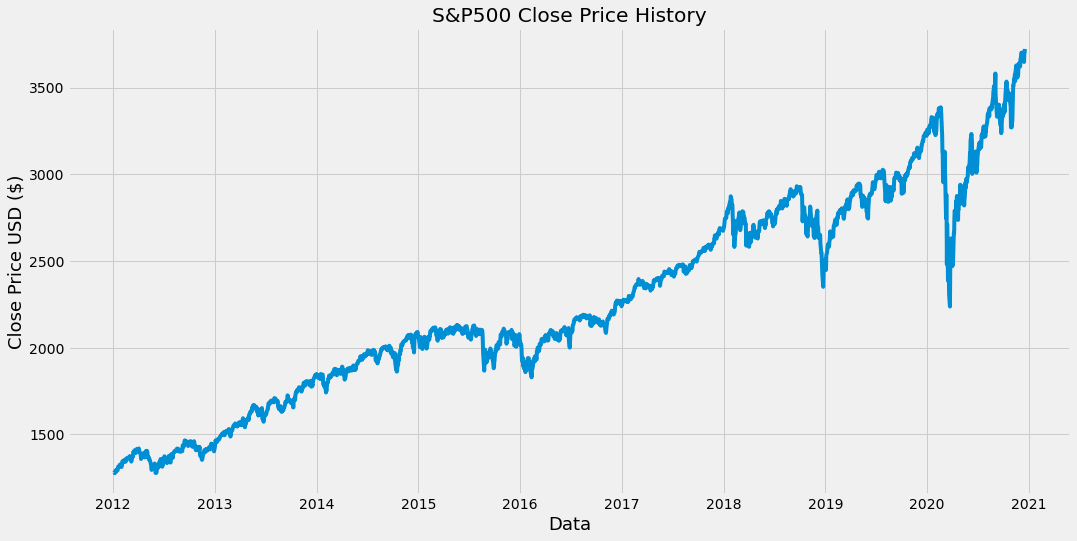

In [4]:
# Visualize the closing price history
# plt.style.use("cyberpunk")
plt.figure(figsize=(16, 8))
plt.title('S&P500 Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# mplcyberpunk.add_glow_effects()
plt.show()

In [5]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1805

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [9.81386600e-05],
       [1.63571089e-03],
       ...,
       [9.88607330e-01],
       [9.91285726e-01],
       [1.00000000e+00]])

In [7]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00000000e+00, 9.81386600e-05, 1.63571089e-03, 3.06695792e-04,
       1.48845298e-03, 6.14205247e-03, 6.30563354e-03, 7.54060325e-03,
       4.91936257e-03, 6.79228349e-03, 1.26685729e-02, 1.53102300e-02,
       1.56700884e-02, 1.59236216e-02, 1.53715791e-02, 2.00374584e-02,
       1.69173379e-02, 1.60585497e-02, 1.47009317e-02, 1.44555850e-02,
       1.92318329e-02, 1.98248080e-02, 2.77416427e-02, 2.75085260e-02,
       2.86208473e-02, 2.98107911e-02, 3.06245532e-02, 2.68174621e-02,
       3.05509742e-02, 3.00316280e-02, 2.70587155e-02, 3.31149590e-02,
       3.44194145e-02, 3.48201557e-02, 3.29595645e-02, 3.53313153e-02,
       3.62636825e-02, 3.70201888e-02, 3.88972030e-02, 3.62391728e-02,
       3.96782190e-02, 3.78544173e-02, 3.56870804e-02, 2.71118781e-02,
       3.09026460e-02, 3.63332182e-02, 3.83614837e-02, 3.84514358e-02,
       4.86173730e-02, 4.79344957e-02, 5.13367524e-02, 5.19787969e-02,
       5.42605956e-02, 5.25308393e-02, 5.14553574e-02, 4.73211041e-02,
     

In [8]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1745, 60, 1)

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1745/1745 [==============================] - 65s 34ms/step - loss: 0.0025


In [13]:
# Create the testing data set
# Create a new array containing scaled values from index 1745 to 2256

test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
# Convert the data into a numpy array
x_test = np.array(x_test)

In [15]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

31.237169354559313

<ipython-input-25-4cab5e177597>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


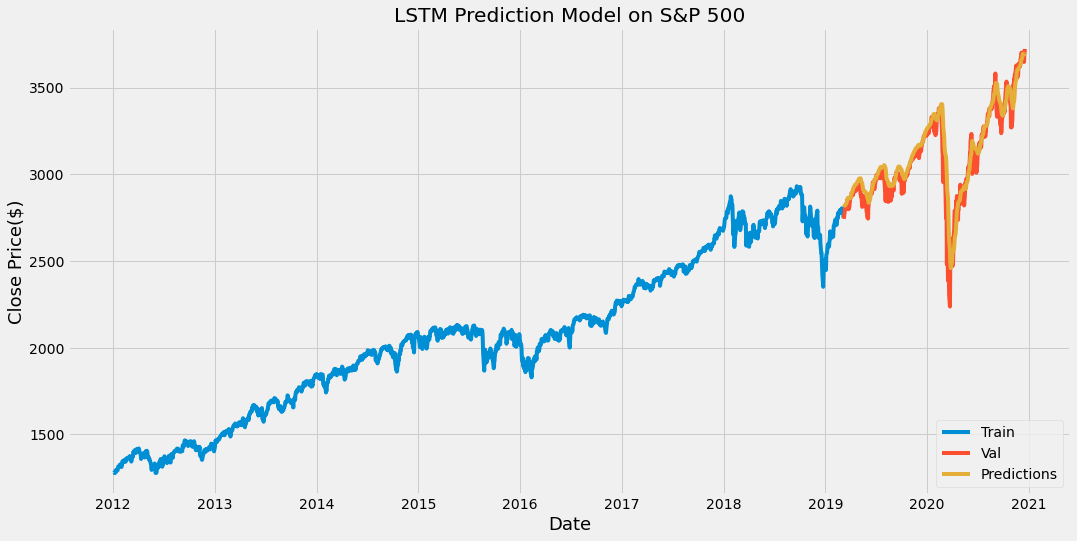

In [25]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize
plt.figure(figsize=(16,8))
plt.title('LSTM Prediction Model on S&P 500')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-08,2743.070068,2829.201172
2019-03-11,2783.300049,2822.472412
2019-03-12,2791.520020,2819.517334
2019-03-13,2810.919922,2819.407715
2019-03-14,2808.479980,2822.821045
...,...,...
2020-12-11,3663.459961,3695.552979
2020-12-14,3647.489990,3695.385254
2020-12-15,3694.620117,3692.397217


In [21]:
# Get the quote
sp500_quote = web.DataReader('^GSPC', data_source='yahoo', start='2012-01-01', end='2020-12-17')
# Create a new dataframe
new_df = sp500_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to the values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[3702.3303]]


In [23]:
sp500_quote2 = web.DataReader('^GSPC', data_source='yahoo', start='2020-12-18', end='2020-12-18')
print(sp500_quote2['Close'])

Date
2020-12-18    3709.409912
2020-12-18    3709.409912
Name: Close, dtype: float64
